# Linear Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## get the training data

In [2]:
dfx = pd.read_csv("linearX.csv")
dfy = pd.read_csv("linearY.csv")
x= dfx.values
y= dfy.values
print(x.shape)
print(y.shape)

(99, 1)
(99, 1)


## Preprocess the data

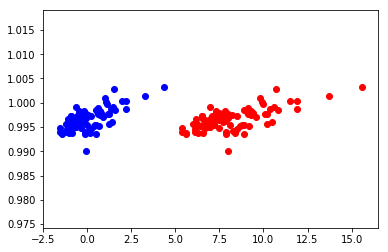

In [3]:
X = (x-x.mean())/x.std()
Y = y
plt.scatter(x,y,color="red")
plt.scatter(X,Y,color="blue")

## gradient descent algorithm
    -start with a random theta
    -repeat until convergence
        -update theta according to rule

In [21]:
def hypothesis(x,theta):
    return theta[0]+ theta[1]*x

def error(X,Y,theta):
    m = X.shape[0]
    err = 0
    for i in range(m):
        err += (hypothesis(X[i],theta)-Y[i])**2
    return err

def gradient(X,Y,theta):
    grad = np.zeros((2,))
    m = X.shape[0]
    for i in range(m):
        grad[0] = grad[0] + (hypothesis(X[i],theta) - Y[i])
        grad[1] = grad[1] + ((hypothesis(X[i],theta) - Y[i])*X[i])
    return grad

##main algorithm
def gradientalgorithm(X,Y,learningrate = 0.001):
    theta = np.zeros((2,))
    max_itr = 100
    itr=0
    error_list =[]
    theta_list =[]
    
    while(itr<max_itr):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        theta_list.append((theta[0],theta[1]))
        theta[0] -= learningrate*grad[0]
        theta[1] -= learningrate*grad[1]
        itr+=1
    return theta,error_list,theta_list
        

In [22]:
final_theta,errorlist,theta_list = gradientalgorithm(X,Y)

In [6]:
print(final_theta)

[0.99660456 0.0013579 ]


[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


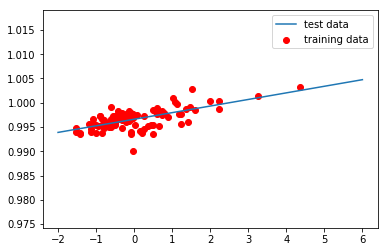

In [7]:
testX = np.linspace(-2,6,10)
print(testX)
plt.scatter(X,Y,color = 'red',label="training data")
plt.plot(testX,hypothesis(testX,final_theta), label="test data")
plt.legend()
plt.show()

# Visualising Gradient Descent

In [8]:
from mpl_toolkits.mplot3d import Axes3D

In [9]:
T0 = np.arange(-2,3,0.01)
T1 = np.arange(-2,3,0.01)
T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
m= T0.shape[0]
n= T1.shape[1]

In [14]:
for i in range(m):
    for j in range (n):
        J[i,j]= np.sum((Y-T1[i,j]*X-T0[i,j])**2)

In [16]:
print(J.shape)

(500, 500)


In [23]:
theta_list=np.array(theta_list)

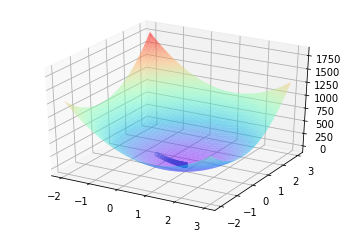

In [25]:
fig = plt.figure()
axes = fig.gca(projection = '3d')
axes.scatter(theta_list[:,0],theta_list[:,1],errorlist)
axes.plot_surface(T0,T1,J,cmap='rainbow',alpha=0.5)
plt.show()

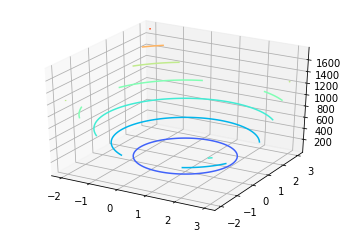

In [20]:
fig = plt.figure()
axes = fig.gca(projection = '3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()

# plot trajectory